In [1]:
import keras.layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
assert tf.__version__ >= "2.0"



2023-05-12 14:54:03.949985: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.__version__


'2.12.0'

In [3]:
data = pd.read_csv('credit_risk_dataset.csv')
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [9]:
from sklearn.model_selection import train_test_split

X = data.drop("loan_status", axis=1)
y = data["loan_status"]

X = pd.get_dummies(X, drop_first=True)
X = X.astype('float32')
y = y.astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Activation functions

In [10]:


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

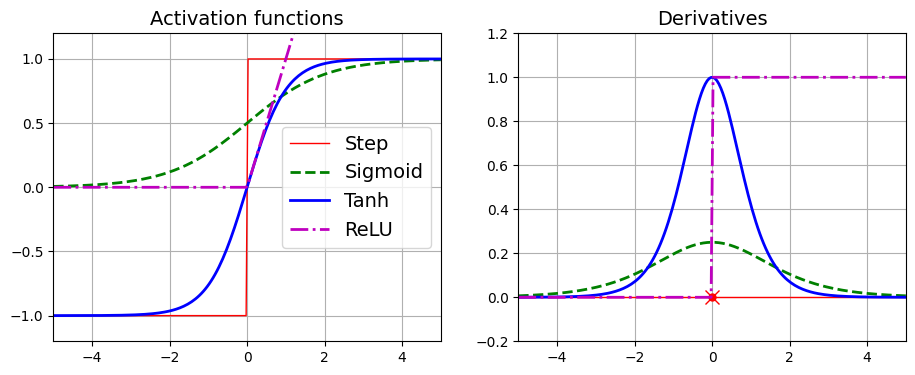

In [11]:
z = np.linspace(-5, 5, 200)
plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [12]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

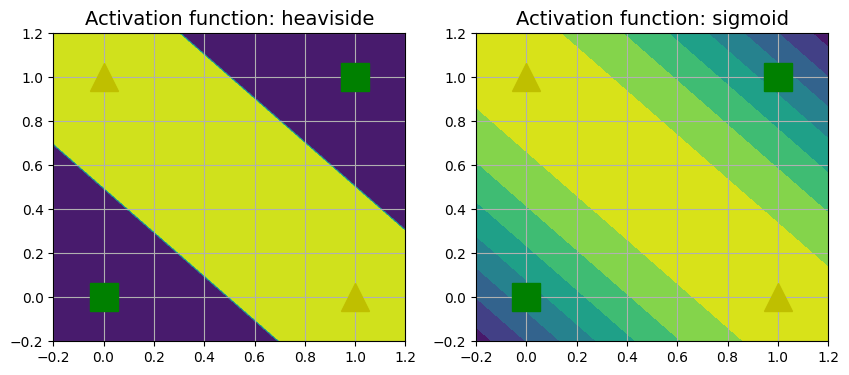

In [13]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

## Sukurtas ir apmokytas DNT modelis

In [14]:


model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

#
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)


print(f"Geriausia epocha: {np.argmin(history.history['val_loss']) + 1}")



Epoch 1/20
287/287 [==============================] - 2s 3ms/step - loss: 5354642.5000 - mse: 5354642.5000 - val_loss: 52900.3867 - val_mse: 52900.3867
Epoch 2/20
287/287 [==============================] - 1s 3ms/step - loss: 68231.6719 - mse: 68231.6719 - val_loss: 23940.1328 - val_mse: 23940.1328
Epoch 3/20
287/287 [==============================] - 1s 3ms/step - loss: 22055.1348 - mse: 22055.1348 - val_loss: 51808.1094 - val_mse: 51808.1094
Epoch 4/20
287/287 [==============================] - 1s 3ms/step - loss: 13533.0303 - mse: 13533.0303 - val_loss: 5656.1709 - val_mse: 5656.1709
Epoch 5/20
287/287 [==============================] - 1s 3ms/step - loss: 5357.0430 - mse: 5357.0430 - val_loss: 3067.5815 - val_mse: 3067.5815
Epoch 6/20
287/287 [==============================] - 1s 3ms/step - loss: 3048.4270 - mse: 3048.4270 - val_loss: 1763.7983 - val_mse: 1763.7983
Epoch 7/20
287/287 [==============================] - 1s 2ms/step - loss: 1907.2834 - mse: 1907.2834 - val_loss: 1108.

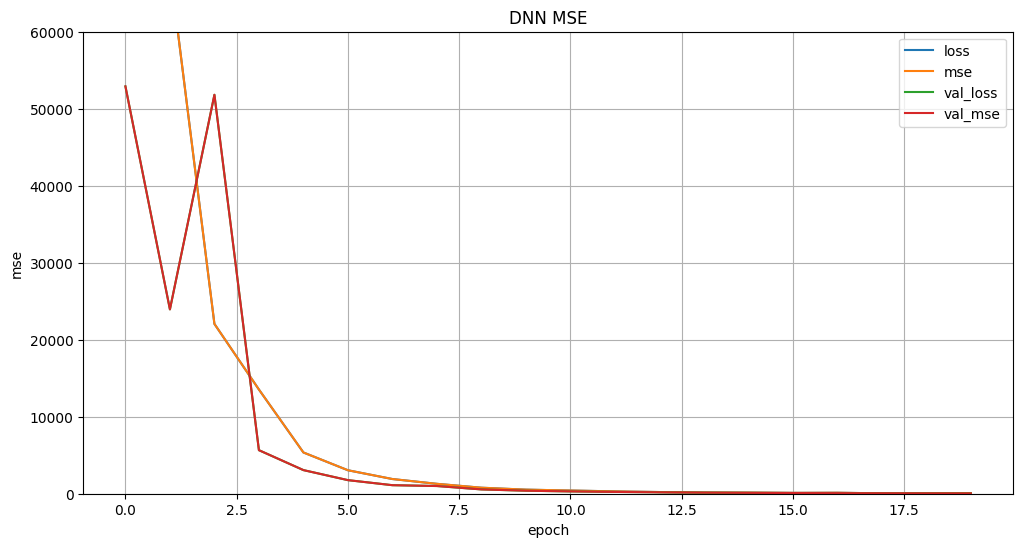

In [39]:
pd.DataFrame(history.history).plot(figsize=(12, 6), grid=True, title="DNN MSE", xlabel="epoch", ylabel="mse")
plt.grid(True)
plt.gca().set_ylim(0, 60000)
plt.show()


/var/folders/nv/yqh6hrw57gz5r7g7fmvq6rsc0000gn/T/ipykernel_22976/3346972370.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=64, verbose=0)


90/90 [==============================] - 0s 1ms/step
Vidutinis tikslumo įvertis: 0.75


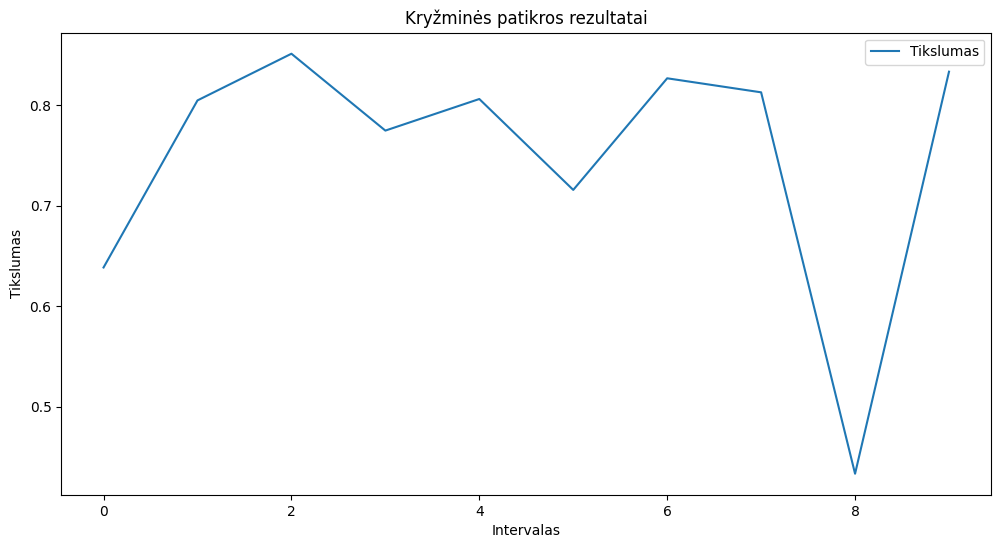

In [16]:
# Įvertinkite sukurto modelio vidutinį tikslumo įvertį, taikant 10 intervalų kryžminės patikros metodą

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=64, verbose=0)

cv_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

print(f"Vidutinis tikslumo įvertis: {cv_scores.mean():.2f}")

plt.figure(figsize=(12, 6))
plt.plot(cv_scores, label='Tikslumas')
plt.xlabel('Intervalas')
plt.ylabel('Tikslumas')
plt.legend(loc='upper right')
plt.title('Kryžminės patikros rezultatai')
plt.show()


In [17]:
# Pritaikykite bet kurią iš priemonių (pavyzdžiai pateikiami žemiau), kad padidintumėte vidutinį tikslumą bent 5 procentais ir pakartokite 4-ą darbo eigos žingsnį:
#Pertvarkyti duomenų rinkinį,
#Pakeiskite mokymosi greitį,
#Pakeiskite aktyvacijos funkciją,
#Pakeisti dirbtinio neuronų tinklo (DNT) struktūrą.
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

# Sukuriama nauja, pagerinta modelio struktūra
def create_improved_model():
    # Sukuriama Sequential modelio struktūra
    model = Sequential()
    # Pridedami paslėpti sluoksniai, sujungti su 'relu' aktyvacijos funkcija
    model.add(Dense(15, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(5, activation='relu'))
    # Pridedamas išvesties sluoksnis su 'sigmoid' aktyvacijos funkcija
    model.add(Dense(1, activation='sigmoid'))

    # Nustatomas mokymosi greitis ir naudojama optimizavimo strategija Adam
    optimizer = Adam(learning_rate=0.001)

    # Modelis kompiliuojamas, nurodant praradimo funkciją ir metriką
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Grąžinamas sukonfigūruotas modelis
    return model

# Sukuriamas KerasClassifier objektas, kuris leidžia naudoti Keras modelį su Scikit-learn metodais
model_improved = KerasClassifier(build_fn=create_improved_model, epochs=20, batch_size=64, verbose=0)

# Apmokomas modelis su mokymo duomenimis
history_improved = model_improved.fit(X_train, y_train, validation_split=0.2)

# Naudojamas kryžminės patikros metodas, apskaičiuojamas modelio tikslumas
# Kfold metodas padalina duomenis į 10 intervalų, iš kurių 9 naudojami mokymui, o 1 - validacijai
cv_scores_improved = cross_val_score(model_improved, X, y, cv=10, scoring='accuracy')
# Apskaičiuojamas vidutinis tikslumas
mean_accuracy_improved = np.mean(cv_scores_improved)
print(f"Improved average accuracy: {mean_accuracy_improved:.2f}")

# Apskaičiuojamas tikslumas  lyginant su ankstesne DNT modelio versija
accuracy_improvement = mean_accuracy_improved - np.mean(cv_scores)
print(f"Average accuracy improvement: {accuracy_improvement*100:.2f}%")

# Patikrinama, ar vidutinis tikslumas padidėjo bent 5%
if accuracy_improvement >= 0.05:
    print("Average accuracy has increased by at least 5%!")
else:
    print(f"Average accuracy has not increased by at least 5%. Increase: {accuracy_improvement:.2f}")




/var/folders/nv/yqh6hrw57gz5r7g7fmvq6rsc0000gn/T/ipykernel_22976/431969288.py:32: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_improved = KerasClassifier(build_fn=create_improved_model, epochs=20, batch_size=64, verbose=0)


90/90 [==============================] - 0s 1ms/step
Improved average accuracy: 0.79
Average accuracy improvement: 4.44%
Average accuracy has not increased by at least 5%. Increase: 0.04


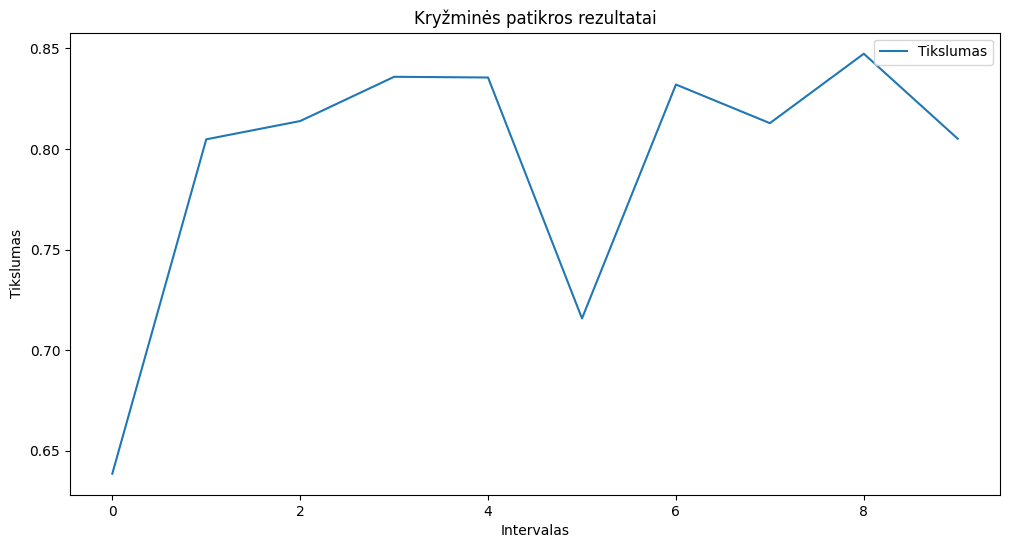

In [18]:
# Draw cv_scores_improved plot
plt.figure(figsize=(12, 6))
plt.plot(cv_scores_improved, label='Tikslumas')
plt.xlabel('Intervalas')
plt.ylabel('Tikslumas')
plt.legend(loc='upper right')
plt.title('Kryžminės patikros rezultatai')
plt.show()

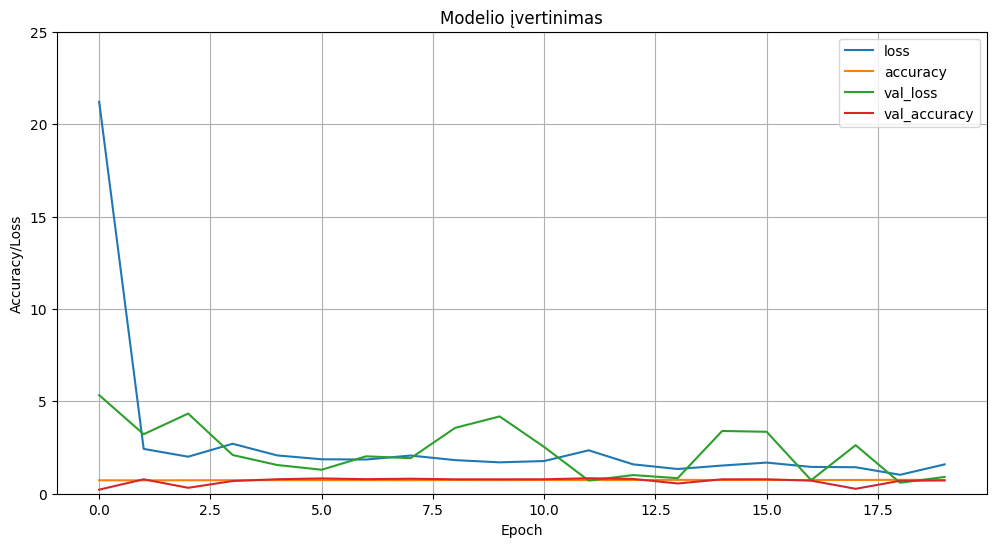

In [47]:
pd.DataFrame(history_improved.history).plot(figsize=(12, 6), grid=True, ylim=(0, 1), title='Modelio įvertinimas', xlabel='Epoch', ylabel='Accuracy/Loss')
plt.grid(True)
plt.gca().set_ylim(0, 25)
plt.show()

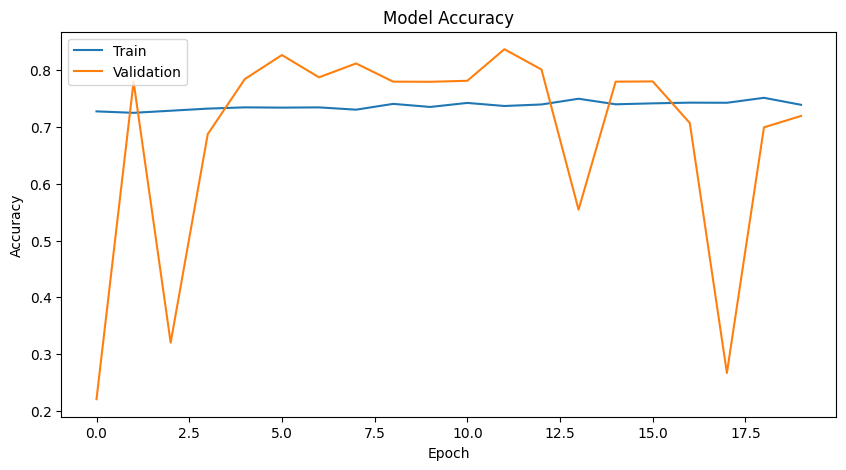

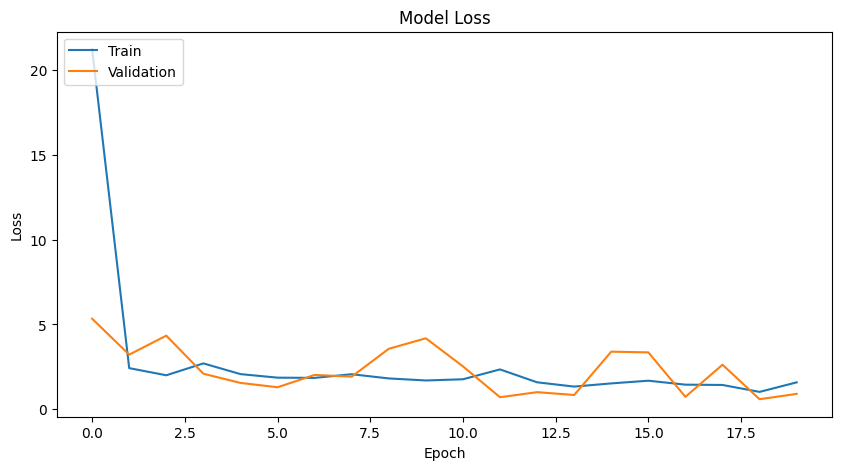

In [20]:

def plot_history(history):

    plt.figure(figsize=(10,5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


    plt.figure(figsize=(10,5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_history(history_improved)
